In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def curves_comparisson(curves_list, experiment_names):
    """
    Muestra dos subplots: uno con curvas de entrenamiento y otro con curvas de validación.

    Args:
        curves_list (list of dict): Cada dict debe tener 'train_loss' y 'val_loss'.
        experiment_names (list of str): Nombres de los experimentos, uno por cada curva.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    for curves, name in zip(curves_list, experiment_names):
        epochs = np.arange(len(curves["train_loss"])) + 1
        ax1.plot(epochs, curves['train_loss'], label=name)
        ax2.plot(epochs, curves['val_loss'], label=name)

    ax1.set_title("Training Loss")
    ax2.set_title("Validation Loss")

    for ax in [ax1, ax2]:
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Loss")
        ax.legend()

    plt.tight_layout()
    plt.show()

In [7]:
curvas_delight_delight_oids = np.load("../resultados\delight_delight_oids\curvas.npy", allow_pickle=True).item()
curvas_delight_sersic_oids = np.load("../resultados\delight_sersic_oids\curvas.npy", allow_pickle=True).item()
curvas_autolabeling_sersic_oids = np.load("../resultados/autolabeling\curvas.npy", allow_pickle=True).item()

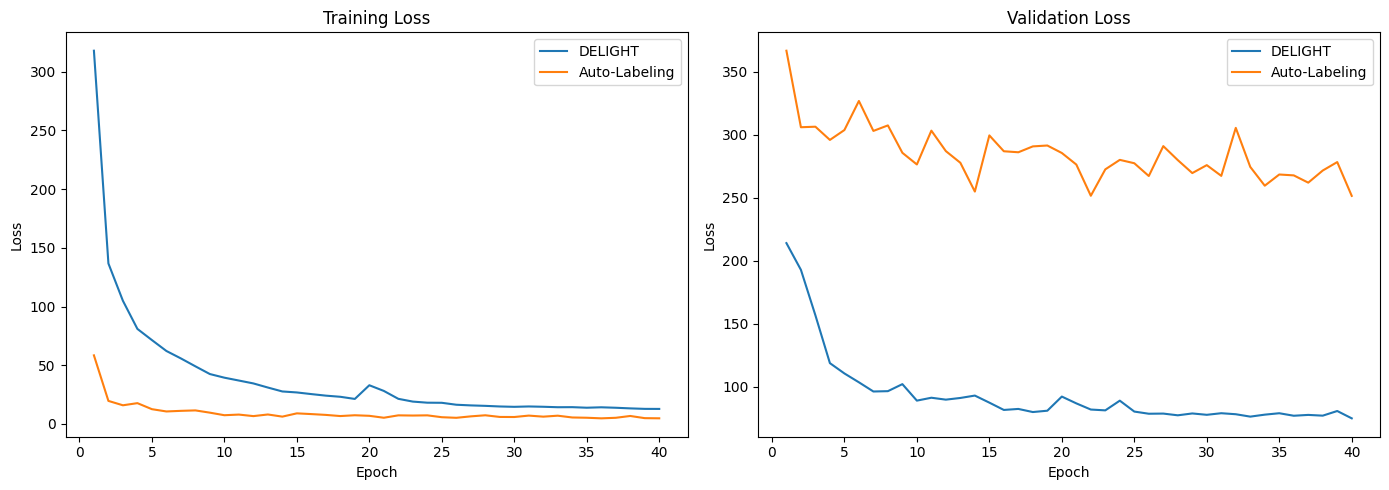

In [8]:
curves_comparisson(
    [curvas_delight_sersic_oids, curvas_autolabeling_sersic_oids],
    ["DELIGHT", "Auto-Labeling"]
)

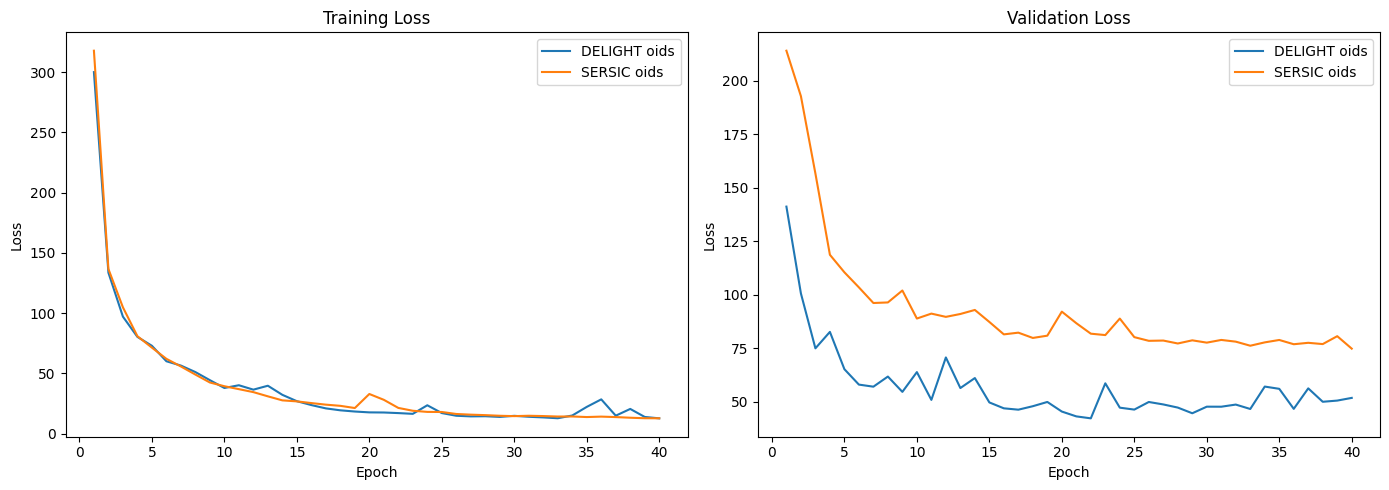

In [4]:
curves_comparisson(
    [curvas_delight_delight_oids, curvas_delight_sersic_oids],
    ["DELIGHT oids", "SERSIC oids"]
)

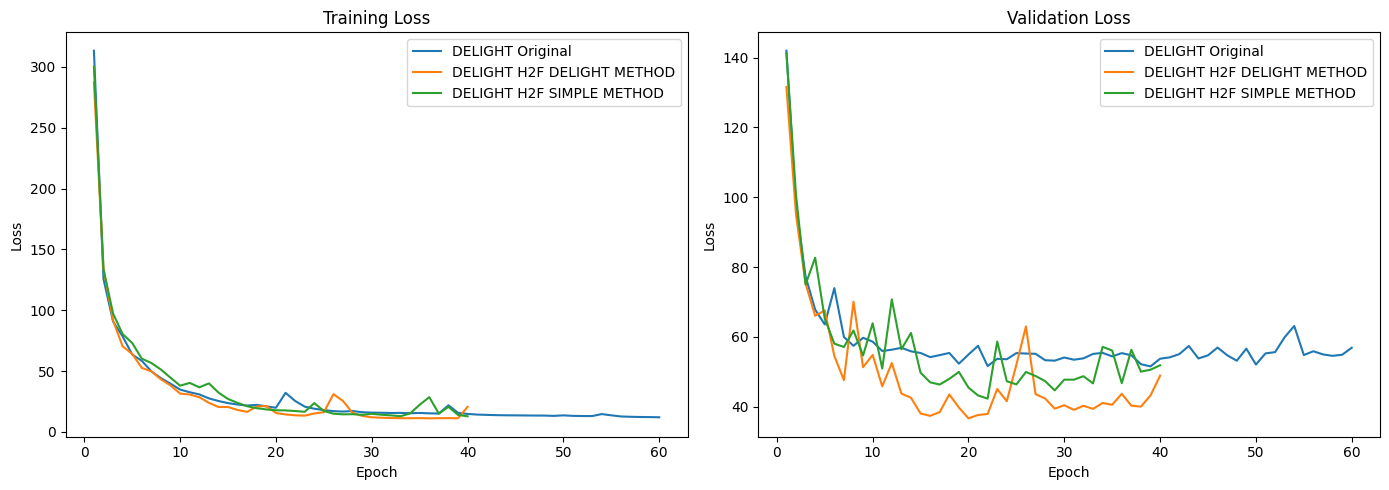

In [ ]:
curves_comparisson(
    [curvas_delight, curvas_delight_h2f_delight_method, curvas_delight_h2f_simple_method],
    ["DELIGHT Original", "DELIGHT H2F DELIGHT METHOD", "DELIGHT H2F SIMPLE METHOD"]
)

In [37]:
preds_delight = torch.tensor(np.load("../resultados\delight/test_predictions.npy"))
preds_delight_classic = torch.tensor(np.load("../resultados\delight_classic/test_predictions.npy"))
preds_delight_h2f_delight_method = torch.tensor(np.load("../resultados\delight_h2f_delight_method/test_predictions.npy"))
preds_delight_h2f_simple_method = torch.tensor(np.load("../resultados\delight_h2f_simple_method/test_predictions.npy"))

y_test = np.load("../data/DELIGHT/y_test.npy")[:, [1, 0]] # originalmente es y,x asi que lo cambiamos x,y
y_test = torch.tensor(y_test.copy())

In [38]:
import pandas as pd

df = pd.read_csv("..\data\SERSIC\delight_sersic.csv", dtype={'objID': 'Int64'})

oid_train = np.load("..\data\DELIGHT\id_train.npy",allow_pickle=True)
oid_val = np.load("..\data\DELIGHT\id_validation.npy",allow_pickle=True)

idx_train = df[df['oid'].isin(oid_train)].index.to_numpy()
idx_val = df[df['oid'].isin(oid_val)].index.to_numpy()
idx_test = np.setdiff1d(df.index, np.union1d(idx_train, idx_val))

y_test2= df[["dx","dy"]].values.astype(np.float32)[idx_test][:, [1, 0]]
y_test2 = torch.tensor(y_test2.copy())

In [39]:
mse = torch.nn.MSELoss()

In [40]:
preds_delight_h2f_delight_method.shape

torch.Size([4788, 8, 2])

In [41]:
mse_delight = mse(preds_delight[:,0,:], y_test)
mse_delight_classic = mse(preds_delight_classic, y_test)
mse_delight_h2f_delight_method = mse(preds_delight_h2f_delight_method[:,0,:], y_test2)
mse_delight_h2f_simple_method = mse(preds_delight_h2f_simple_method[:,0,:], y_test2)

In [42]:
mse_delight

tensor(35.3088, dtype=torch.float64)

In [43]:
mse_delight_classic

tensor(40.9547, dtype=torch.float64)

In [44]:
mse_delight_h2f_delight_method

tensor(52.9208)

In [45]:
mse_delight_h2f_simple_method

tensor(59.3293)